# 1. XOR with Theano

Let's explore the XOR problem with different activation functions and input ranges.

In [1]:
from conx import Network
import numpy as np
import theano.tensor as T
import theano

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

## 1.1 sigmoid

First, with the sigmoid. Theano comes with a sigmoid function:

In [3]:
sigmoid = lambda inputs: T.nnet.sigmoid(inputs) # or just use t.nnet.sigmoid

Let's see the output of that function. However, you can't just call a Theano function in Python.

In [4]:
sigmoid([0.5])

sigmoid.0

As you see, you just get back a label. You need to generate Python code by turning the Theano function into a Python function:

In [5]:
inputs = T.vector(dtype=theano.config.floatX)
pf = theano.function([inputs], sigmoid(inputs))

In [6]:
pf([0.5])

array([ 0.62245933])

To see the output of a range of values, let's plot a range of 

In [7]:
def plot_tf(tf, start, stop, title):
    """
    Plot a Theano function by turning it into a Python function,
    applied to range(start, stop).
    """
    inputs = T.vector(dtype=theano.config.floatX)
    pf = theano.function([inputs], tf(inputs))
    plot_pf(pf, start, stop, title)
    
def plot_pf(pf, start, stop, title):
    """
    Plot a Python function, applied to a range(start, stop)
    """
    res = (stop - start) / 100
    plt.plot(np.arange(start, stop, res), pf(np.arange(start, stop, res)))
    plt.title(title)
    plt.xlabel("input")
    plt.ylabel("ouput")

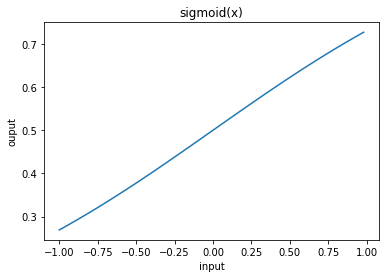

In [8]:
plot_tf(sigmoid, -1, 1, "sigmoid(x)")

In [9]:
x = T.dscalar('x')
y = T.nnet.sigmoid(x)
dx = theano.function([x], T.grad(y, x))
pf = lambda xs: [dx(x) for x in xs]

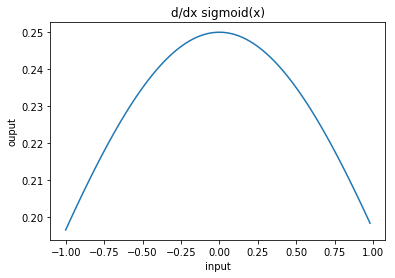

In [10]:
plot_pf(pf, -1, 1, "d/dx sigmoid(x)")

In [11]:
net = Network(2, 2, 1, activation_function=sigmoid) # or, T.nnet.sigmoid

In [12]:
net

Network:--------------------------------------------------
Layer 0:
    Type: <class 'conx.network.Layer'>
    Act : <function <lambda> at 0x7f03e4c319d8>
    In  : 2
    Out : 2
--------------------------------------------------
Layer 1:
    Type: <class 'conx.network.Layer'>
    Act : <function <lambda> at 0x7f03e4c319d8>
    In  : 2
    Out : 1
--------------------------------------------------

In [13]:
# input low and high values:
ilo = -1
ihi = 1
# output low and high values:
olo = 0
ohi = 1

In [14]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [20]:
def test_net(net, res=20):
    m = np.zeros((res, res))
    step = (ihi - ilo)/res
    for i in range(res):
        for j in range(res):
            m[i][j] = net.propagate([ilo + i * step, ilo + j * step])
    plt.matshow(m, 
                origin="lower", # lower puts 0,0 bottom left
                extent=[ilo,ihi,ilo,ihi], # tick label ranges
                cmap=cm.coolwarm,
                interpolation="none")
    plt.xlabel("input(0)")
    plt.ylabel("input(1)")
    plt.colorbar()
    
def plot_net(net, res=20, angle=45):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(ilo, ihi, (ihi - ilo)/res)
    Y = np.arange(ilo, ihi, (ihi - ilo)/res)

    Z = np.array([[net.propagate([x, y])[0] for x in X] for y in Y])
    X, Y = np.meshgrid(X, Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(olo - 0.01, ohi + 0.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.view_init(30, angle) # tilt, rotate

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

In [21]:
net.reset()

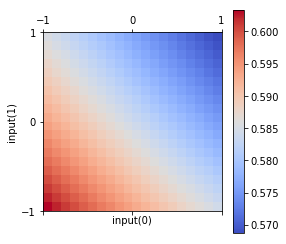

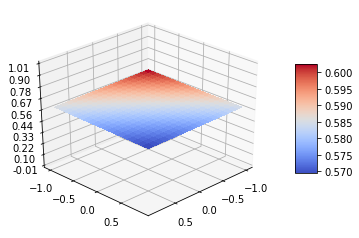

In [22]:
test_net(net)
plot_net(net)

In [23]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.02393903616 %correct: 0.0
Epoch: 500 TSS error: 0.678976924574 %correct: 0.25
Epoch: 1000 TSS error: 0.67275290586 %correct: 0.25
Epoch: 1500 TSS error: 0.669901322389 %correct: 0.25
Epoch: 2000 TSS error: 0.669071209818 %correct: 0.25
Epoch: 2500 TSS error: 0.688990533867 %correct: 0.25
Epoch: 3000 TSS error: 0.669251026502 %correct: 0.25
Epoch: 3500 TSS error: 0.669657382648 %correct: 0.25
Epoch: 4000 TSS error: 0.671333961616 %correct: 0.25
Epoch: 4500 TSS error: 0.667725866593 %correct: 0.25
Epoch: 5000 TSS error: 0.680478796455 %correct: 0.25
--------------------------------------------------
Epoch: 5000 TSS error: 0.680478796455 %correct: 0.25
--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.26418435851 %correct: 0.0
--------------------------------------------------
Epoch: 189 TSS error: 0.0331210263205 %correct: 1.0

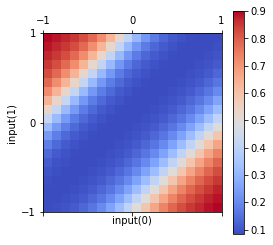

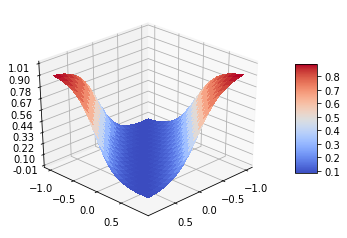

In [24]:
test_net(net)
plot_net(net)

## 1.2 sigmoid with reduced input range

In [25]:
net = Network(2, 2, 1, activation_function=sigmoid)

In [26]:
# input low and high values:
ilo = -0.5
ihi = 0.5
# output low and high values:
olo = 0
ohi = 1

In [27]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [28]:
net.reset()

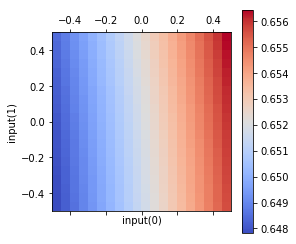

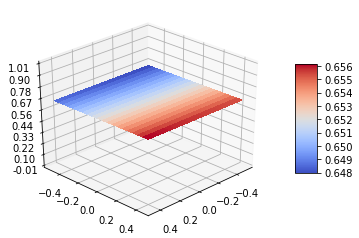

In [29]:
test_net(net)
plot_net(net)

In [30]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.3411372012 %correct: 0.0
--------------------------------------------------
Epoch: 388 TSS error: 0.0369984286108 %correct: 1.0


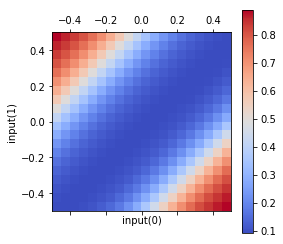

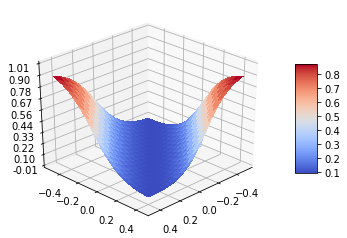

In [31]:
test_net(net)
plot_net(net)

In [32]:
net.test()

--------------------------------------------------
Test:
******************************
Input : -0.5, 0.5 
Output:  0.9 
Target:  1.0 Correct
******************************
Input :  0.5,-0.5 
Output:  0.9 
Target:  1.0 Correct
******************************
Input :  0.5, 0.5 
Output:  0.1 
Target:  0.0 Correct
******************************
Input : -0.5,-0.5 
Output:  0.1 
Target:  0.0 Correct
--------------------------------------------------
Epoch: 388 TSS error: 0.0369984286108 %correct: 1.0


## 1.3 sigmoid with offset

Let's try an adjusted sigmoid that is moved over a bit:

In [33]:
sigmoid_offset = lambda inputs: T.nnet.sigmoid(inputs - 0.5)

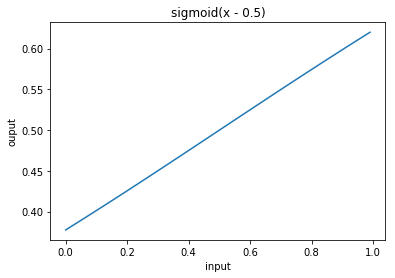

In [34]:
plot_tf(sigmoid_offset, 0, 1, "sigmoid(x - 0.5)")

In [35]:
x = T.dscalar('x')
y = T.nnet.sigmoid(x - 0.5)
dx = theano.function([x], T.grad(y, x))
pf = lambda xs: [dx(x) for x in xs]

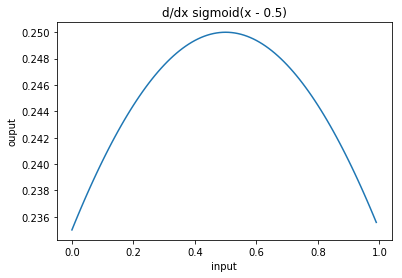

In [36]:
plot_pf(pf, 0, 1, "d/dx sigmoid(x - 0.5)")

In [37]:
net = Network(2, 2, 1, activation_function=sigmoid_offset)

In [38]:
# input low and high values:
ilo = 0
ihi = 1
# output low and high values:
olo = 0
ohi = 1

In [39]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [40]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.00345297145 %correct: 0.0
Epoch: 500 TSS error: 0.034691671426 %correct: 0.75
--------------------------------------------------
Epoch: 505 TSS error: 0.0329752585837 %correct: 1.0


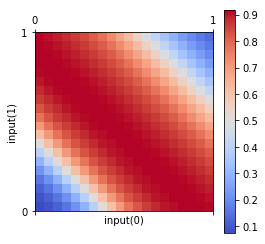

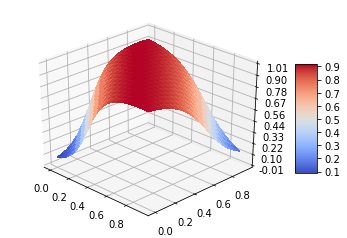

In [41]:
test_net(net)
plot_net(net, angle=-45)

In [42]:
net.test()

--------------------------------------------------
Test:
******************************
Input :  1.0, 0.0 
Output:  0.9 
Target:  1.0 Correct
******************************
Input :  0.0, 0.0 
Output:  0.1 
Target:  0.0 Correct
******************************
Input :  1.0, 1.0 
Output:  0.1 
Target:  0.0 Correct
******************************
Input :  0.0, 1.0 
Output:  0.9 
Target:  1.0 Correct
--------------------------------------------------
Epoch: 505 TSS error: 0.0329752585837 %correct: 1.0


## 1.4 tanh

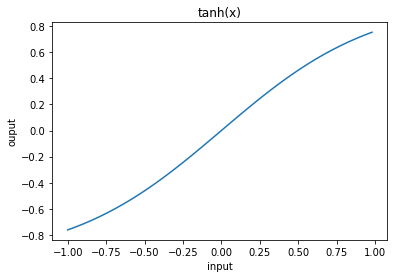

In [43]:
plot_tf(T.tanh, -1 , 1, "tanh(x)")

In [44]:
x = T.dscalar('x')
y = T.tanh(x)
dx = theano.function([x], T.grad(y, x))
pf = lambda xs: [dx(x) for x in xs]

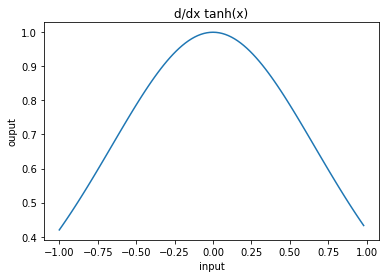

In [45]:
plot_pf(pf, -1, 1, "d/dx tanh(x)")

In [46]:
net = Network(2, 2, 1, activation_function=T.tanh)

In [47]:
# input low and high values:
ilo = -1
ihi = 1
# output low and high values:
olo = 0.0
ohi = 1.0

In [48]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [49]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.35601694569 %correct: 0.0
Epoch: 500 TSS error: 1.0497584127 %correct: 0.5
Epoch: 1000 TSS error: 1.99788034227 %correct: 0.5
Epoch: 1500 TSS error: 1.97620970904 %correct: 0.5
Epoch: 2000 TSS error: 1.03717854626 %correct: 0.5
Epoch: 2500 TSS error: 1.06760419938 %correct: 0.5
Epoch: 3000 TSS error: 1.00107861937 %correct: 0.75
Epoch: 3500 TSS error: 1.99832698118 %correct: 0.5
Epoch: 4000 TSS error: 1.99851846173 %correct: 0.5
Epoch: 4500 TSS error: 1.18594018322 %correct: 0.5
Epoch: 5000 TSS error: 1.02790924608 %correct: 0.5
--------------------------------------------------
Epoch: 5000 TSS error: 1.02790924608 %correct: 0.5
--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.67123261764 %correct: 0.5
Epoch: 500 TSS error: 1.00085517103 %correct: 0.75
Epoch: 1000 TSS error: 1.02691161508 %correct: 0.5
Epoch: 1500 TSS error

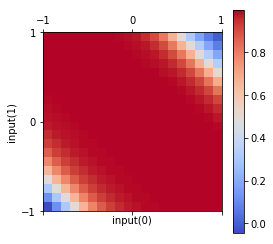

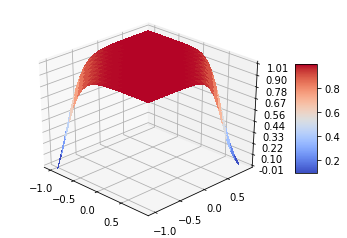

In [51]:
test_net(net)
plot_net(net, angle=-45)

In [52]:
net.test()

--------------------------------------------------
Test:
******************************
Input :  1.0, 1.0 
Output: -0.1 
Target:  0.0 Correct
******************************
Input : -1.0,-1.0 
Output: -0.0 
Target:  0.0 Correct
******************************
Input :  1.0,-1.0 
Output:  1.0 
Target:  1.0 Correct
******************************
Input : -1.0, 1.0 
Output:  1.0 
Target:  1.0 Correct
--------------------------------------------------
Epoch: 2029 TSS error: 0.0113536787757 %correct: 1.0


## tanh -1,1 with batch = True

This seems to work well, but only in batch mode.

In [53]:
net = Network(2, 2, 1, activation_function=T.tanh)
net.batch = True

In [54]:
# input low and high values:
ilo = -1
ihi = 1
# output low and high values:
olo = -1.0
ohi = 1.0

In [55]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [56]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 7.07017426459 %correct: 0.0
--------------------------------------------------
Epoch: 26 TSS error: 0.025058988129 %correct: 1.0


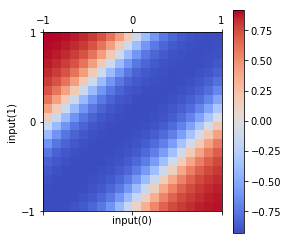

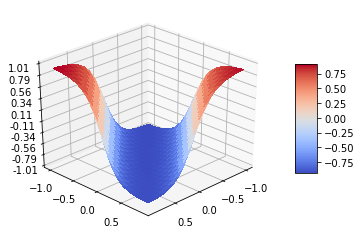

In [57]:
test_net(net)
plot_net(net)

In [58]:
net.test()

--------------------------------------------------
Test:
******************************
Input : -1.0,-1.0 
Output: -0.9 
Target: -1.0 Correct
******************************
Input :  1.0, 1.0 
Output: -0.9 
Target: -1.0 Correct
******************************
Input :  1.0,-1.0 
Output:  0.9 
Target:  1.0 Correct
******************************
Input : -1.0, 1.0 
Output:  0.9 
Target:  1.0 Correct
--------------------------------------------------
Epoch: 26 TSS error: 0.025058988129 %correct: 1.0


## tanh 0,1 with batch mode

conx has a method of only updating the weights after each epoch.

In [59]:
net = Network(2, 2, 1, activation_function=T.tanh)

In [60]:
net.batch = True

In [61]:
# input low and high values:
ilo = -1
ihi = 1
# output low and high values:
olo = 0
ohi = 1

In [62]:
net.set_inputs([[[ilo, ilo], [olo]], [[ihi, ihi], [olo]], [[ilo, ihi], [ohi]], [[ihi, ilo], [ohi]]])

In [63]:
while net.last_cv_percent != 1.0:
    net.reset()
    net.train()

--------------------------------------------------
Training for max trails: 5000 ...
Epoch: 0 TSS error: 1.25738984118 %correct: 0.0
--------------------------------------------------
Epoch: 87 TSS error: 0.0190134394193 %correct: 1.0


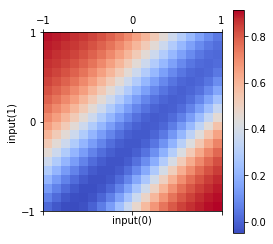

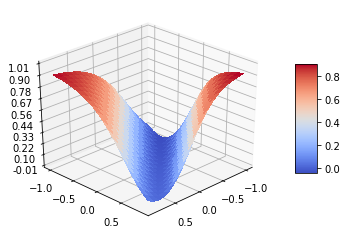

In [65]:
test_net(net)
plot_net(net)